# Noises 
- Gürültüler, görüntü elde etme sürecindeki hataların bir sonucudur.
- Gerçek sahnenin gerçek yoğunluklarını yansıtmayan piksel değerleriyle sonuçlanır.

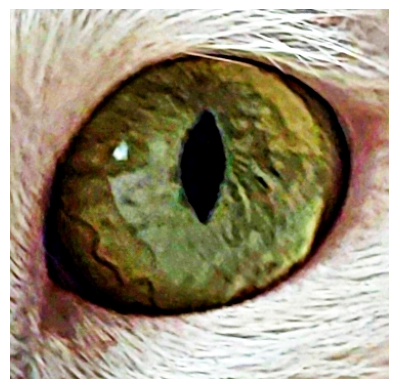

In [1]:
import matplotlib.pyplot as plt

image = plt.imread("eye.jpg")
plt.imshow(image), plt.axis("off")

## Apply noise in scikit-image

(<matplotlib.image.AxesImage at 0x7f86376824d0>, (-0.5, 369.5, 360.5, -0.5))

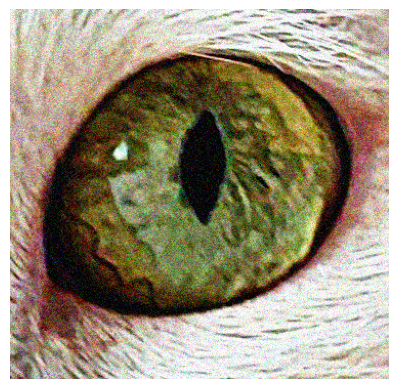

In [2]:
from skimage.util import random_noise

noise_img = random_noise(image)
plt.imshow(noise_img), plt.axis("off")

## Denoising

Görüntünün çözünürülüğü ne kadar yüksek olursa paraziti ortadan kaldırmak o kadar uzun sürebilir 

Denoising Types - Gürültü ortadan kaldırma çeşitleri 
- Total Variation (TV) - Görüntünün toplam varyasyonunu en aza indirmeye çalışur - çizgi film benzeri parçalı sabit görüntüler üretme eğilimindedir
- Bilateral : İki tarafllı filtreleme görüntüleri korurken pürüzsüzleştirir.- her pikselin yoğunluğunu yakınındaki piksellerden gelen ağırlıklı ortalama yoğunluk değerleriyle değiştirir



### Denoising with total variation

(<matplotlib.image.AxesImage at 0x7f861e53a410>, (-0.5, 369.5, 360.5, -0.5))

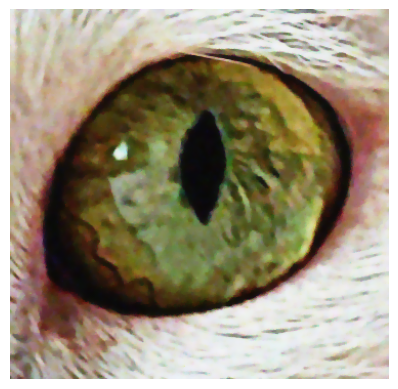

In [3]:
from skimage.restoration import denoise_tv_chambolle

denoised_tv = denoise_tv_chambolle(noise_img, weight=0.1, multichannel=True)
 #weight : isteğe bağlı denoise için ağırlık ne kadar büyük olursa gürültü o kadar fazla olur ama aynı zamanda gürültüyü daha pürüzsüz hale getirebilir
plt.imshow(denoised_tv) , plt.axis("off")

### Bilateral denoising
Ortaya çıkan görüntü tv denoising ile karşılaştırıldığında daha pürüzsüz görünmektedir
Kenarları daha fazla korur

(<matplotlib.image.AxesImage at 0x7f861e598250>, (-0.5, 369.5, 360.5, -0.5))

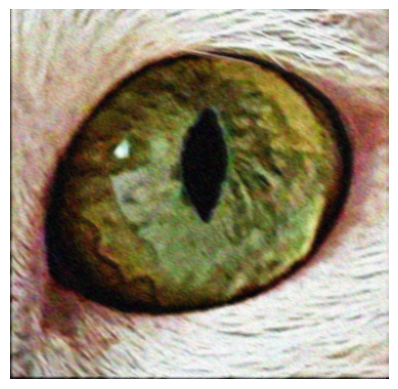

In [4]:
from skimage.restoration import denoise_bilateral

denoised_bn = denoise_bilateral(noise_img, multichannel=True) 

plt.imshow(denoised_bn), plt.axis("off")

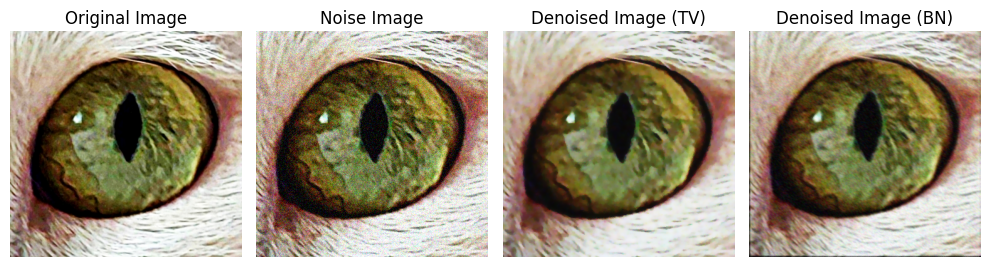

(None, None)

In [9]:
# Karşılaştırma
f, (x1, x2, x3, x4) = plt.subplots(1, 4, figsize=(10, 10))
x1.imshow(image), x1.set_title("Original Image"), x1.axis("off")
x2.imshow(noise_img), x2.set_title("Noise Image"), x2.axis("off")
x3.imshow(denoised_tv), x3.set_title("Denoised Image (TV)"), x3.axis("off")
x4.imshow(denoised_bn), x4.set_title("Denoised Image (BN)"), x4.axis("off")
plt.tight_layout(), plt.show()